In [1]:
#import necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Data Loading

In [3]:
#Load dataframe
df=pd.read_csv("income_data.csv")

#loading the first 5 
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
#Checking for missing values 
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

## Data Preprocessing

- ##### Data cleaning 

In [7]:
#Making a copy of the original dataset before cleaning
income=df.copy()
#Making every column name capital letter 
income.columns=income.columns.str.upper()
income.head(5)


,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,INCOME
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
#checking if all missing values have been dropped 
income.isnull().sum()

AGE                 0
WORKCLASS         963
FNLWGT              0
EDUCATION           0
EDUCATION-NUM       0
MARITAL-STATUS      0
OCCUPATION        966
RELATIONSHIP        0
RACE                0
SEX                 0
CAPITAL-GAIN        0
CAPITAL-LOSS        0
HOURS-PER-WEEK      0
NATIVE-COUNTRY    274
INCOME              0
dtype: int64

In [9]:
# Dropping Missing Values 
income.dropna(inplace=True)

#Checking for missing values 
income.isnull().sum()

AGE               0
WORKCLASS         0
FNLWGT            0
EDUCATION         0
EDUCATION-NUM     0
MARITAL-STATUS    0
OCCUPATION        0
RELATIONSHIP      0
RACE              0
SEX               0
CAPITAL-GAIN      0
CAPITAL-LOSS      0
HOURS-PER-WEEK    0
NATIVE-COUNTRY    0
INCOME            0
dtype: int64

In [10]:
income.count()

AGE               47621
WORKCLASS         47621
FNLWGT            47621
EDUCATION         47621
EDUCATION-NUM     47621
MARITAL-STATUS    47621
OCCUPATION        47621
RELATIONSHIP      47621
RACE              47621
SEX               47621
CAPITAL-GAIN      47621
CAPITAL-LOSS      47621
HOURS-PER-WEEK    47621
NATIVE-COUNTRY    47621
INCOME            47621
dtype: int64

In [11]:
income.shape # number of rows and columns 

(47621, 15)

 # Data Analysis 
-  #### Univariate  Visualization

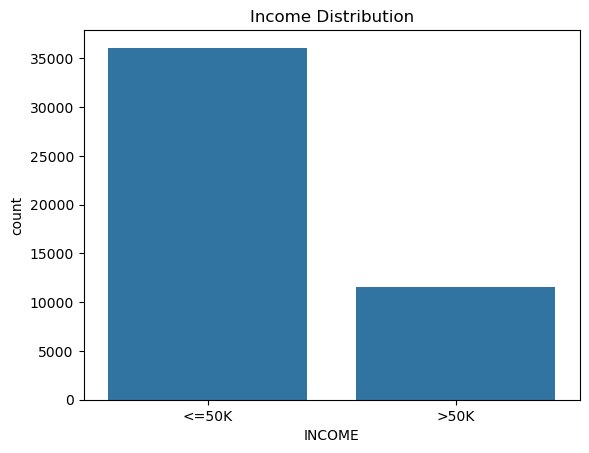

In [13]:
# Create the bar plot
sns.countplot(x='INCOME', data=income, legend=False)

# Add labels and title
plt.title('Income Distribution')

plt.show()


- The “≤50K” group towers over the “>50K” group, highlighting a large income disparity in the dataset.
- Thist suggest that a majority of the population earns in the lower-income rang..


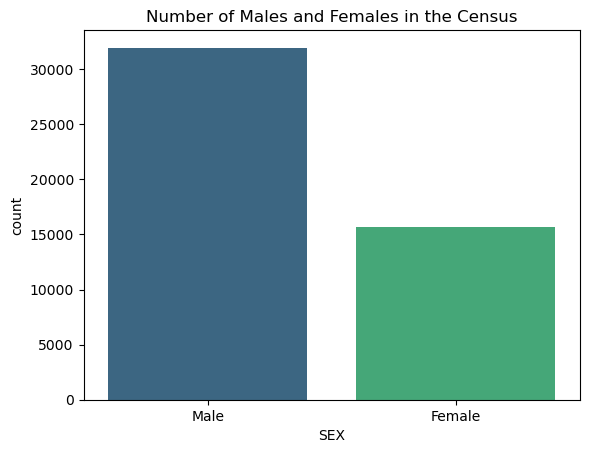

In [15]:
# Create the bar plot
sns.countplot(x='SEX', hue='SEX', data=income, palette='viridis', legend=False)

# Add labels and title
plt.title('Number of Males and Females in the Census')


# Show the plot
plt.show()

>  Males significantly outnumber Females, with their bar rising much higher on the count axis.


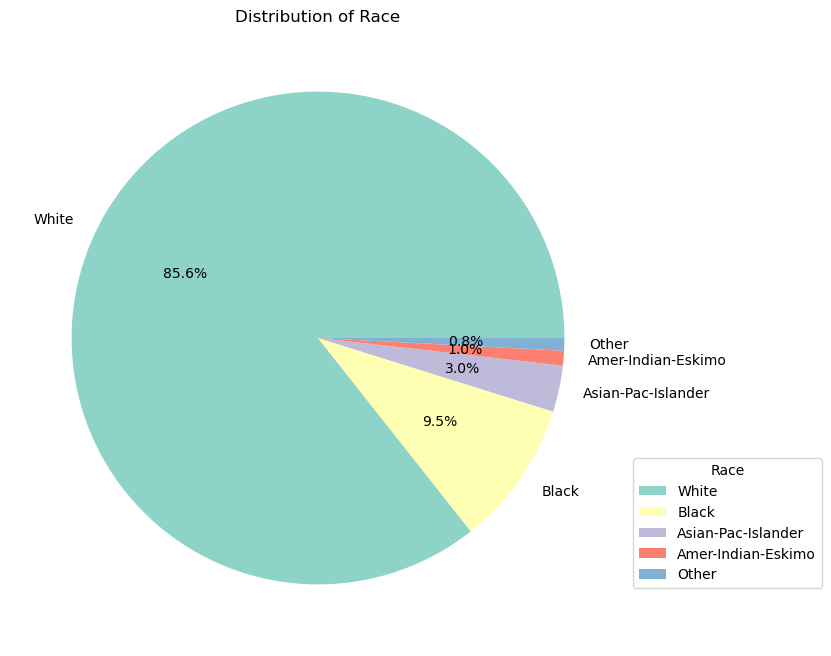

In [17]:

# Count the number of occurrences per race
race_counts = income['RACE'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Distribution of Race')
plt.legend(title='Race', loc='center left',
    bbox_to_anchor=(1, 0.2),)
plt.show()


> This chart shows the racial breakdown of a population, with White individuals forming a large majority at 85.6%. Minority groups include Black (9.5%), Asian-Pacific Islander (3.0%), American Indian/Eskimo (1.0%), and Other (0.8%). The overall distribution suggests a racially homogenous sample with limited diversity.


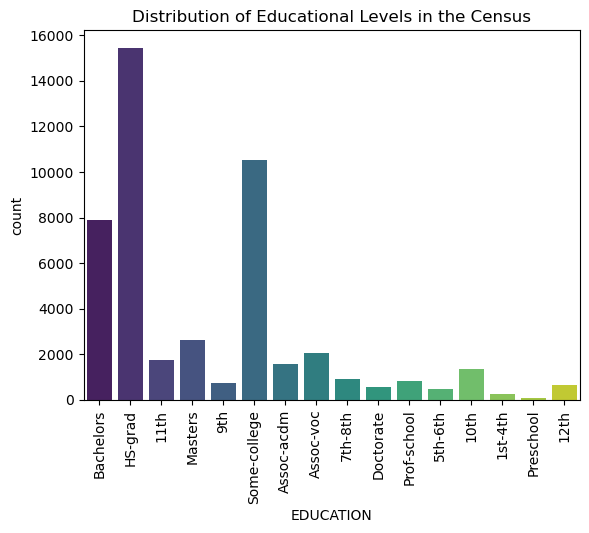

In [19]:
# Create the bar plot
sns.countplot(x='EDUCATION', hue='EDUCATION', data=income, palette='viridis', legend=False)

# Add labels and title
plt.title('Distribution of Educational Levels in the Census')
plt.xticks(rotation=90)

# Show the plot
plt.show()

>This chart highlights the education levels within the census population. The majority have a high school diploma, followed by those with some college or a bachelor’s degree. Fewer individuals fall at the extremes—either with very early education or advanced degrees—suggesting a concentration in mid-level academic attainment.
.


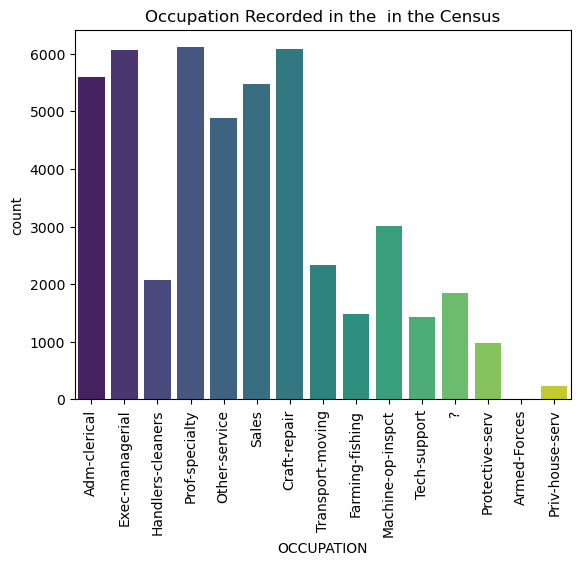

In [21]:
# Create the bar plot
sns.countplot(x='OCCUPATION', hue='OCCUPATION', data=income, palette='viridis', legend=False)

# Add labels and title
plt.title('Occupation Recorded in the  in the Census')
plt.xticks(rotation=90)

# Show the plot
plt.show()

>> Craft-repair tops the list with the highest number of individuals, indicating a strong presence in skilled manual work.
Priv-house-serv and Armed Forces have the lowest counts, suggesting minimal representation in those sectors.
 it reflects a diverse labor force with varying levels of engagement across clerical, managerial, service, and technical roles.


In [23]:
# Dropping the the rows where "?" is a value in the column Occupation
income.drop(income[income['OCCUPATION'] == '?'].index, inplace=True) 

income["OCCUPATION"].value_counts()


OCCUPATION
Prof-specialty       6110
Craft-repair         6089
Exec-managerial      6058
Adm-clerical         5589
Sales                5474
Other-service        4891
Machine-op-inspct    3006
Transport-moving     2341
Handlers-cleaners    2066
Farming-fishing      1485
Tech-support         1436
Protective-serv       981
Priv-house-serv       238
Armed-Forces           14
Name: count, dtype: int64

> #### By doing this we can effectively perform label-enconding when building our model.

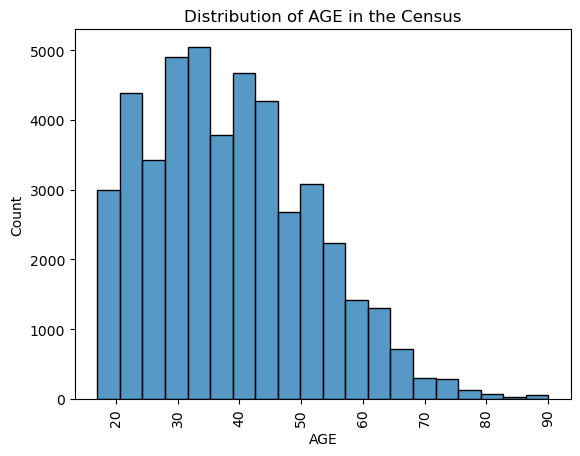

In [25]:
# Create the bar plot
sns.histplot(data=income, x='AGE', bins=20)

# Add labels and title
plt.title('Distribution of AGE in the Census')
plt.xticks(rotation=90)

# Show the plot
plt.show()

>The highest concentrations are around the 30 to 40-year-old range, meaning those are the most represented ages in the dataset. As age increases beyond 40, the number of individuals decreases steadily, with only a small population above 80.


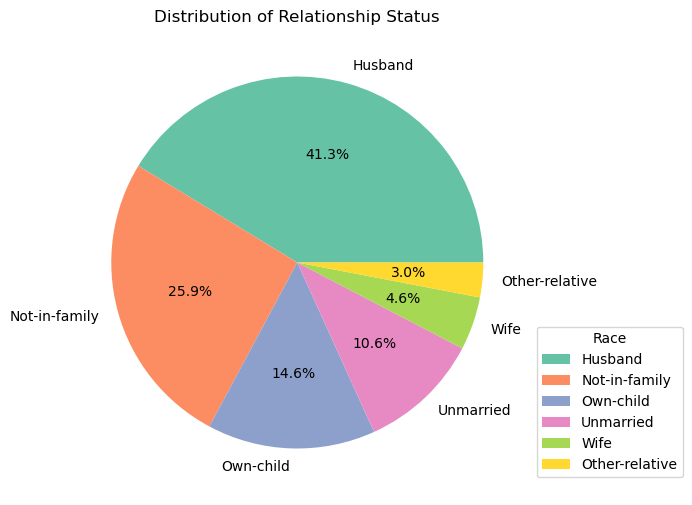

In [27]:
# Distribution of relationship status 
relationship_counts = income['RELATIONSHIP'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 8))
plt.pie(relationship_counts, labels=relationship_counts.index, autopct='%1.1f%%', colors=plt.cm.Set2.colors)
plt.title('Distribution of Relationship Status')
plt.legend(title='Race', loc='center left',
    bbox_to_anchor=(1, 0.2),)
plt.show()

>The largest slice—Husband at 41.3%—suggests a strong presence of married men in this census. That’s followed by Not-in-family (25.9%), which could represent individuals living independently or with non-relatives. Then there’s a mix of Own-child (14.6%), Unmarried (10.6%), Wife (4.6%), and Other-relative (3.0%).


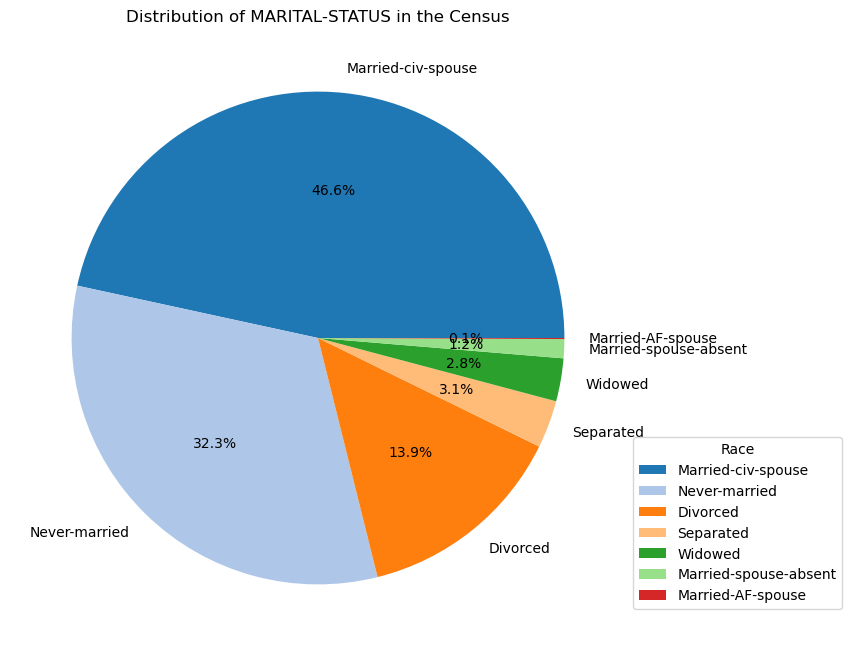

In [29]:
# Distribution of Marital status 
Marital_counts = income['MARITAL-STATUS'].value_counts()

# Create a pie chart
plt.figure(figsize=(11, 8))
plt.pie(Marital_counts, labels=Marital_counts.index, autopct='%1.1f%%',colors = plt.cm.tab20.colors)
plt.title('Distribution of MARITAL-STATUS in the Census')
plt.legend(title='Race', loc='center left',
    bbox_to_anchor=(1, 0.2),)
plt.show()

>The population is predominantly composed of currently married or never-married individuals (nearly 79%), which may reflect cultural or socioeconomic patterns around marriage and family structures. The presence of divorced and widowed segments also highlights the dynamic nature of marital transitions, possibly influenced by age, health, or social changes.

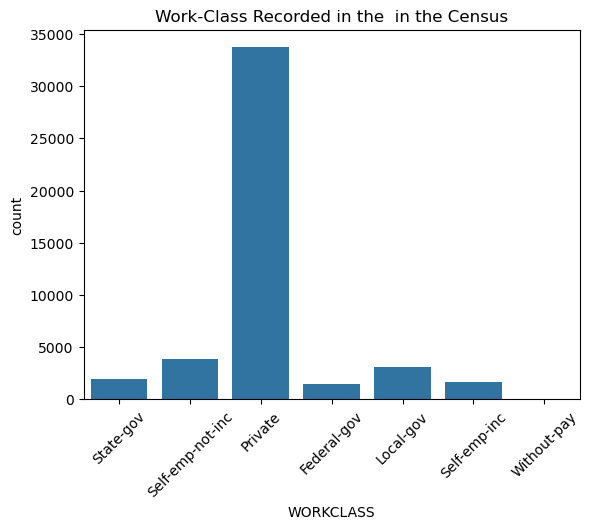

In [31]:
# Create the bar plot
sns.countplot(data=income, x='WORKCLASS', fill=True)


# Adding labels and title
plt.title('Work-Class Recorded in the  in the Census')
plt.xticks(rotation=45)

# Show the plot
plt.show()

>The workforce is heavily concentrated in the private sector, with meaningful but smaller segments engaged in self-employment and government roles. The presence of self-employed individuals reflects entrepreneurial dynamics, while public sector representation indicates diversified employment options. The low incidence of unpaid work suggests the data focuses primarily on income-generating employment.

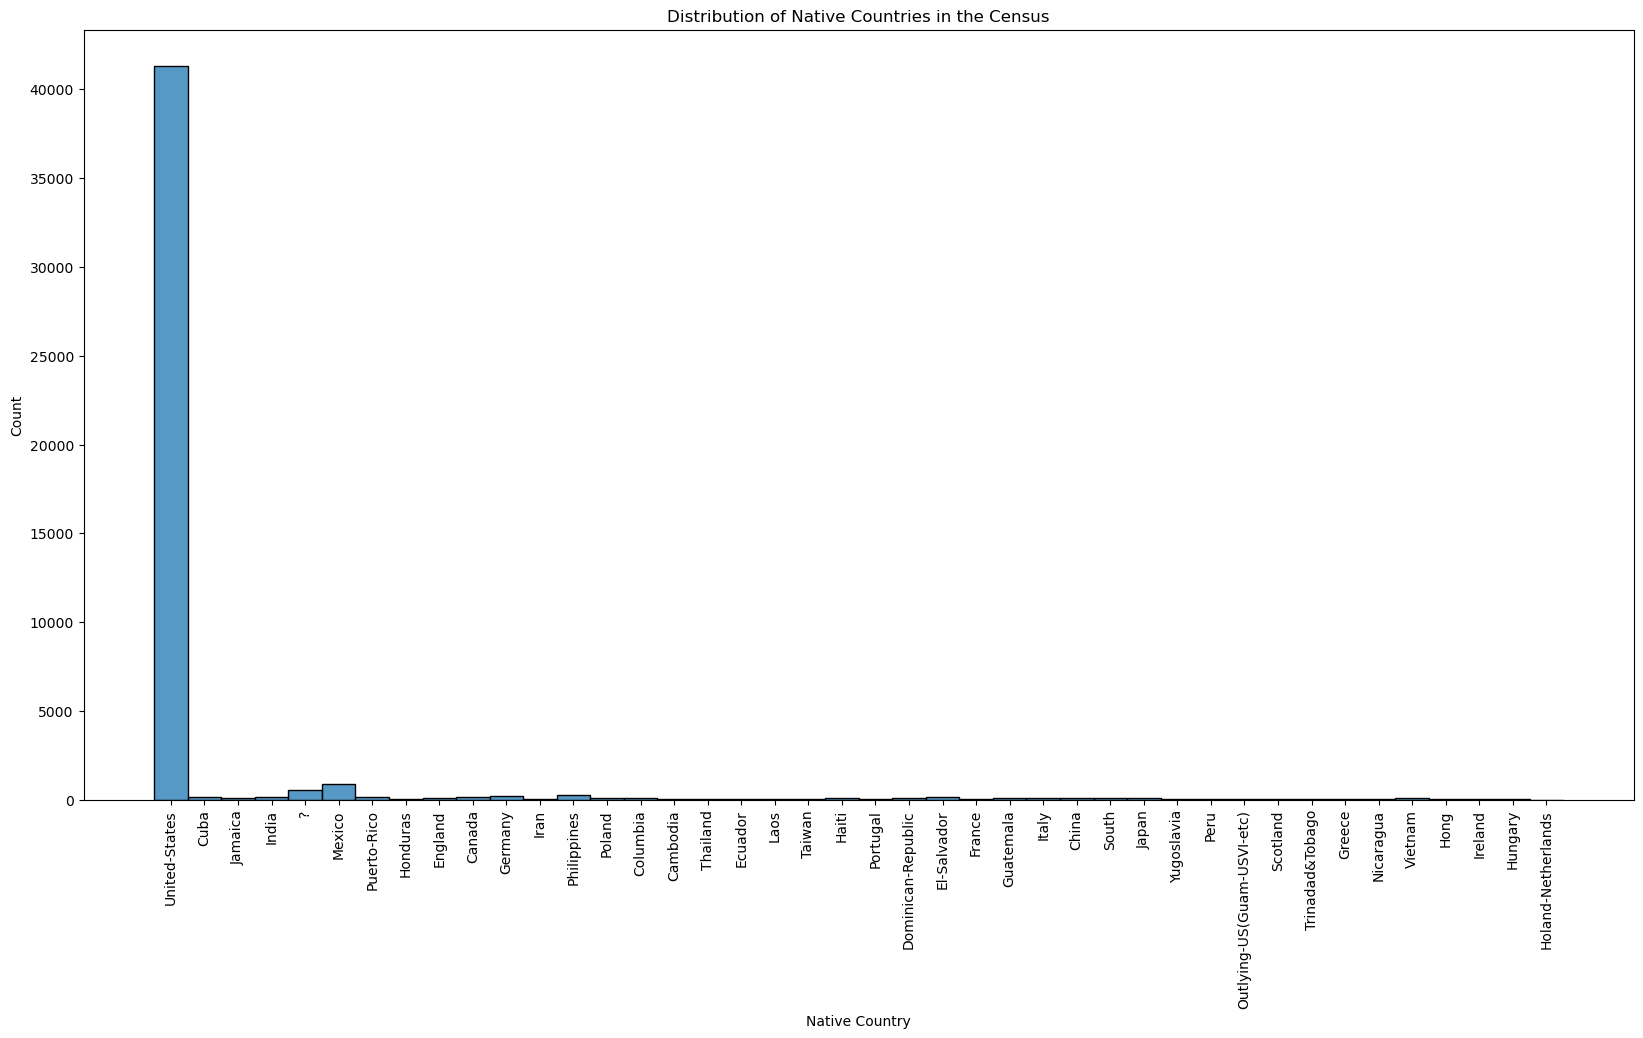

In [33]:

plt.figure(figsize=(20, 10)) 

# Create the histogram
sns.histplot(data=income, x='NATIVE-COUNTRY', fill=True, legend=True)

# Adding labels and title
plt.title('Distribution of Native Countries in the Census')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Display the plot

plt.show()


> The dataset is heavily skewed toward U.S. natives, with Mexico and a few Asian and European countries being the most significant foreign contributors. This reflects real-world immigration trends, where proximity, historical migration paths, and economic opportunities influence representation. The wide range of countries shows cultural diversity, but also suggests that any analysis involving nationality will be disproportionately weighted by the U.S. population.

In [35]:
# Dropping of the ? values in the column
income.drop(income[income['NATIVE-COUNTRY']=='?'].index,inplace=True) # dropping the ? varlue in NATIVE-COUNTRY

income['NATIVE-COUNTRY'].value_counts()

NATIVE-COUNTRY
United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

- ### Bi-virate and Multivariate Visualisations

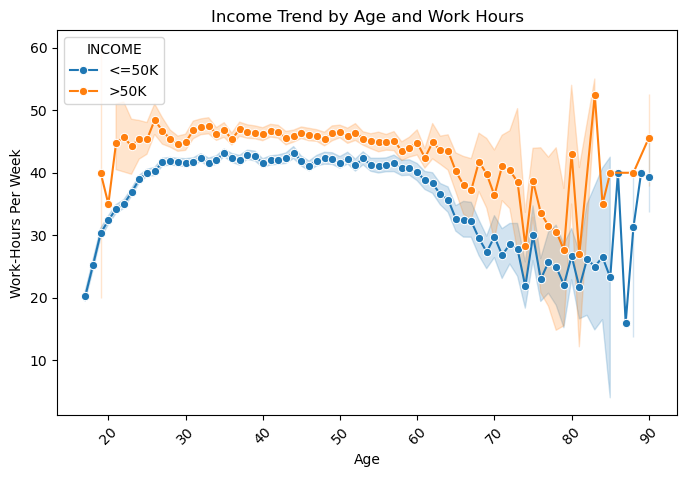

In [37]:
# Line plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=income, x="AGE", y="HOURS-PER-WEEK",hue="INCOME",marker="o", linestyle="-")
plt.title("Income Trend by Age and Work Hours")
plt.xlabel("Age")
plt.ylabel("Work-Hours Per Week")
plt.xticks(rotation=45)
plt.show()

> People who earn more tend to work more hours per week on average, especially during their prime working years. However, after a certain age (around 65), work hours drop for everyone, and income disparities become less defined due to retirement and reduced working capacity.

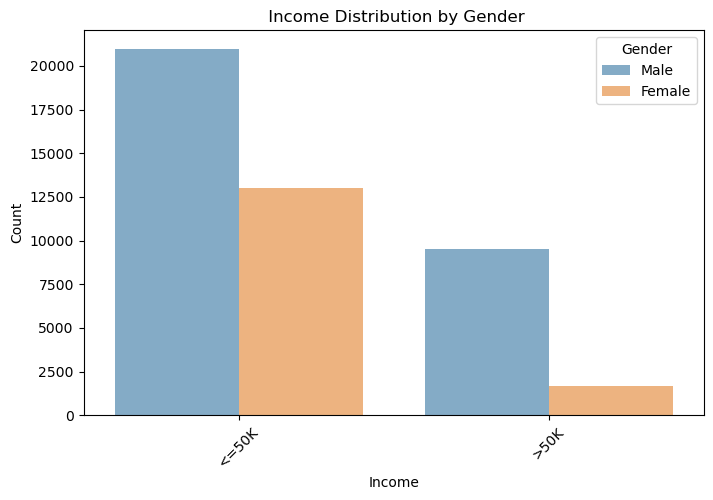

In [39]:
plt.figure(figsize=(8, 5))

# Bar chart with gender differentiation
sns.countplot(data=income, x="INCOME", hue="SEX", alpha=0.6)
plt.title(" Income Distribution by Gender")
plt.xlabel("Income")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Gender")  

plt.show()

- Males dominate in both income groups (<=50K and >50K).

- A significantly higher number of males earn >50K compared to females.

- Though many females also earn <=50K, very few females earn >50K, highlighting a gender income disparity.

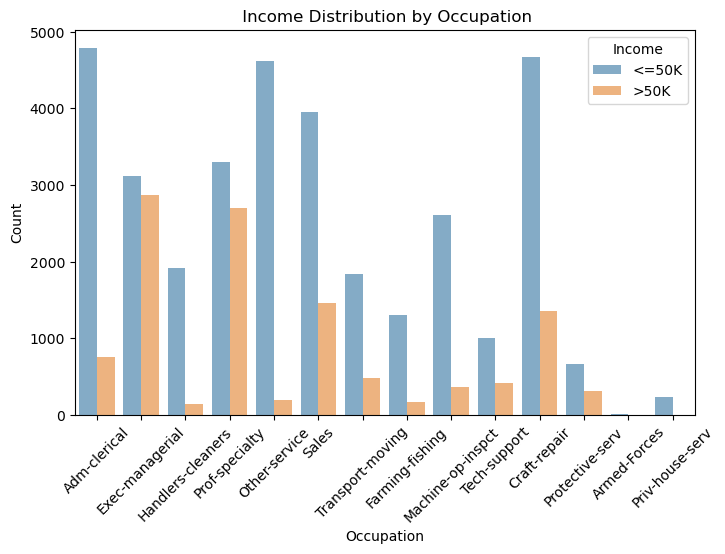

In [41]:
plt.figure(figsize=(8, 5))

# Bar chart with gender differentiation
sns.countplot(data=income, x="OCCUPATION", hue="INCOME", alpha=0.6)
plt.title(" Income Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Income")  

plt.show()

>Further analysis by occupation shows that income levels are heavily influenced by job type, with roles such as Exec-managerial, Professional-specialty, and Tech-support offering a greater proportion of >$50K earners. However, even within these high-paying occupations, males dominate the higher income category, indicating a systemic underrepresentation of women in top-earning roles.

>In contrast, lower-income roles such as Handlers-cleaners and Other-service are densely populated by individuals earning ≤$50K, with limited gender disparity at this level—suggesting gender income gaps widen as income increases.

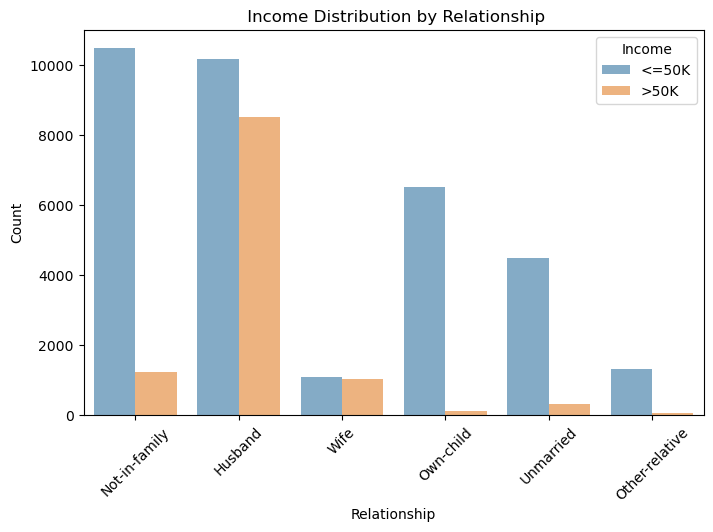

In [43]:

plt.figure(figsize=(8, 5))

# Bar chart with gender differentiation
sns.countplot(data=income, x="RELATIONSHIP", hue="INCOME", alpha=0.6)
plt.title(" Income Distribution by Relationship")
plt.xlabel("Relationship")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Income")  

plt.show()


> This chart compares income distribution across different relationship roles. Most individuals in every category—whether Not-in-family, Husband, Wife, or Own-child—earn (<=50k) , highlighting widespread lower-income levels. The trend suggests that relationship status has little impact on the likelihood of earning above (>50K) in this population. 


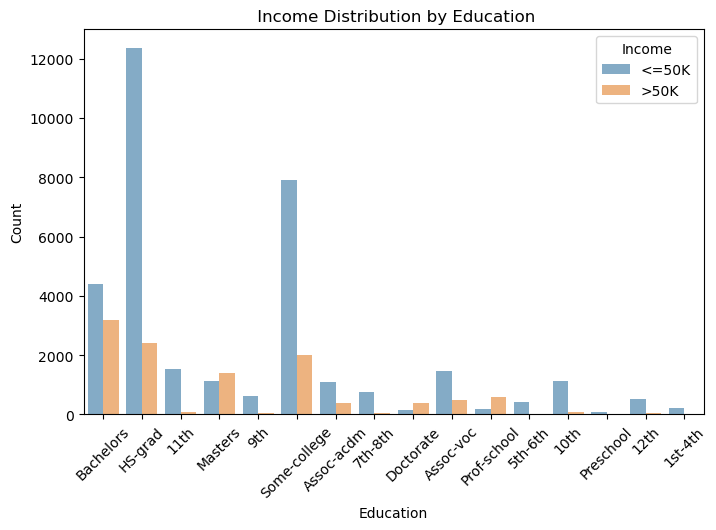

In [45]:
plt.figure(figsize=(8, 5))

# Bar chart with gender differentiation
sns.countplot(data=income, x="EDUCATION", hue="INCOME", alpha=0.6)
plt.title(" Income Distribution by Education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Income")  

plt.show()

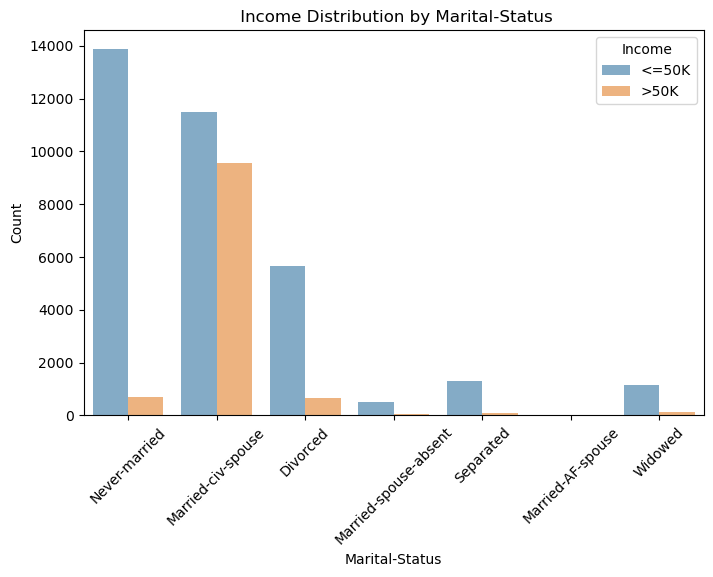

In [46]:
plt.figure(figsize=(8, 5))

# Bar chart with gender differentiation
sns.countplot(data=income, x="MARITAL-STATUS", hue="INCOME", alpha=0.6)
plt.title(" Income Distribution by Marital-Status")
plt.xlabel("Marital-Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Income")  

plt.show()

> It explores how marital status relates to income levels in the population. Most individuals across all statuses—especially the Never-married and Divorced groups—earn $50K or less. Only the Married-civ-spouse group shows a noticeable share of higher earners, but even there, lower-income individuals still dominate. It paints a clear picture of income concentration across relationship categories.


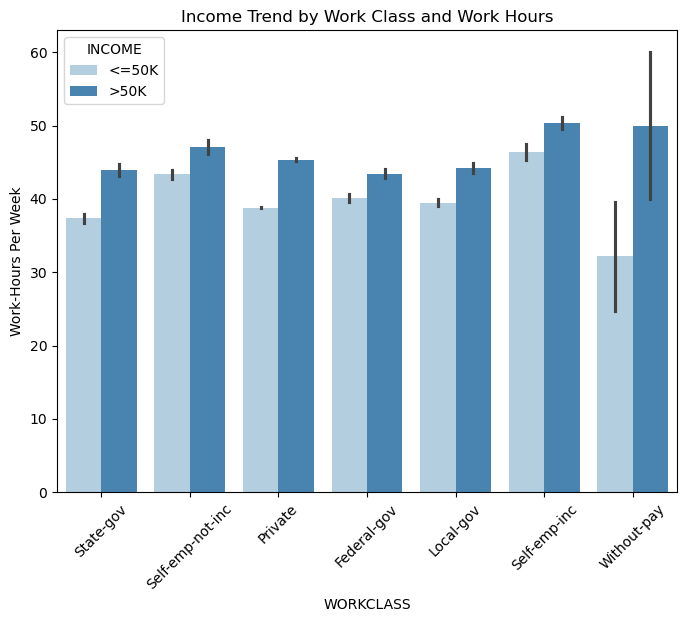

In [48]:
# Line plot
plt.figure(figsize=(8, 6))
sns.barplot(data=income, x="WORKCLASS", y="HOURS-PER-WEEK",hue="INCOME",palette="Blues")
plt.title("Income Trend by Work Class and Work Hours")
plt.xlabel("WORKCLASS")
plt.ylabel("Work-Hours Per Week")
plt.xticks(rotation=45)
plt.show()

>This  shows how work hours per week relate to both work class and income level. In nearly every category, individuals earning >50K tend to work longer hours than those earning <=50K or less. The difference is especially noticeable in sectors like Self-employed (incorporated) and Without pay, suggesting income is closely linked to work intensity in these groups


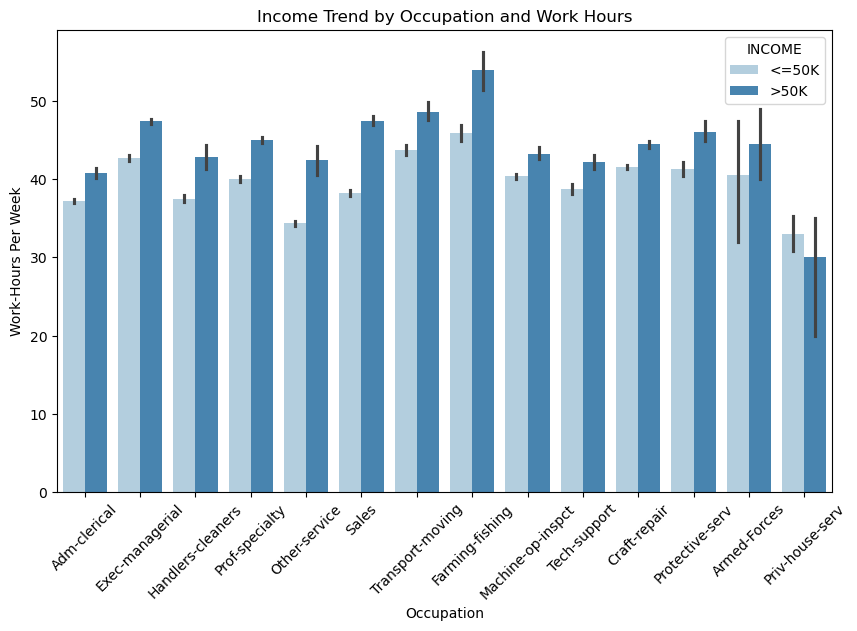

In [50]:
# Line plot
plt.figure(figsize=(10, 6))
sns.barplot(data=income, x="OCCUPATION", y="HOURS-PER-WEEK",hue="INCOME",palette="Blues")
plt.title("Income Trend by Occupation and Work Hours")
plt.xlabel("Occupation")
plt.ylabel("Work-Hours Per Week")
plt.xticks(rotation=45)
plt.show()

> This  compares average weekly work hours across various occupations, split by income levels (<=50K vs >50K). In nearly every occupation like Exec-managerial, Craft-repair, and Sales. Those earning <=50K tend to work longer hours than their lower-income counterparts. The trend underscores a consistent link between higher income and increased work hours across most job types


## Feature Selection

In [53]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             45222 non-null  int64 
 1   WORKCLASS       45222 non-null  object
 2   FNLWGT          45222 non-null  int64 
 3   EDUCATION       45222 non-null  object
 4   EDUCATION-NUM   45222 non-null  int64 
 5   MARITAL-STATUS  45222 non-null  object
 6   OCCUPATION      45222 non-null  object
 7   RELATIONSHIP    45222 non-null  object
 8   RACE            45222 non-null  object
 9   SEX             45222 non-null  object
 10  CAPITAL-GAIN    45222 non-null  int64 
 11  CAPITAL-LOSS    45222 non-null  int64 
 12  HOURS-PER-WEEK  45222 non-null  int64 
 13  NATIVE-COUNTRY  45222 non-null  object
 14  INCOME          45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [54]:
# Dropping  FNLWGT ,EDUCATION-NUM columns which are not necessary information needed to train our model
income.drop(["EDUCATION-NUM", "FNLWGT"],axis=1)

print(income.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             45222 non-null  int64 
 1   WORKCLASS       45222 non-null  object
 2   FNLWGT          45222 non-null  int64 
 3   EDUCATION       45222 non-null  object
 4   EDUCATION-NUM   45222 non-null  int64 
 5   MARITAL-STATUS  45222 non-null  object
 6   OCCUPATION      45222 non-null  object
 7   RELATIONSHIP    45222 non-null  object
 8   RACE            45222 non-null  object
 9   SEX             45222 non-null  object
 10  CAPITAL-GAIN    45222 non-null  int64 
 11  CAPITAL-LOSS    45222 non-null  int64 
 12  HOURS-PER-WEEK  45222 non-null  int64 
 13  NATIVE-COUNTRY  45222 non-null  object
 14  INCOME          45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB
None


## Feature Engineering & Feature Scaling

> We are going to Encode columns and drop columns uncessary for the prediction of income

In [57]:
# Assume 'income' column is the target before encoding
# Extract target column before encoding
y = income["INCOME"]  # Save the target
X = income.drop("INCOME", axis=1)  # Drop target from features
X.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [60]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Identify column types
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# For numerical features: standardization 
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# For categorical features: one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [62]:
from sklearn.decomposition import PCA

# Combine preprocessing and modeling
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',PCA(n_components=0.95)),  #  PCA
    ('classifier', RandomForestClassifier(random_state=42))
])

## Model Training 

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#training Random Forest Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AGE', 'FNLWGT',
                                                   'EDUCATION-NUM',
                                                   'CAPITAL-GAIN',
                                                   'CAPITAL-LOSS',
                                                   'HOURS-PER-WEEK']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['WORKCLASS', 'EDUCATION',
                                                   'MARITAL-STATUS',
                                                   'OCCUPATION', 'RELATIONSHIP',
                                                   'RACE', 'SEX',
                                                   'NATIVE-COUNTRY'])])),
                ('pca', PCA(n_components=0.95)),
                ('classifier', RandomForestClassifier(random_state=42))])

# Evaluate the Model

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer

#  Predict class labels and probabilities
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for class '>50K'

#  Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='>50K')
recall = recall_score(y_test, y_pred, pos_label='>50K')
f1 = f1_score(y_test, y_pred, pos_label='>50K')

# 3. ROC-AUC score
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)
roc_auc = roc_auc_score(y_test_binary, y_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)



Accuracy: 0.8431177446102819
Precision: 0.7295466388744137
Recall: 0.6086956521739131
F1 Score: 0.6636643754444181
ROC-AUC Score: 0.8949757308150965


In [71]:
#Evaluating the MOdel
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90      6745
        >50K       0.73      0.61      0.66      2300

    accuracy                           0.84      9045
   macro avg       0.80      0.77      0.78      9045
weighted avg       0.84      0.84      0.84      9045



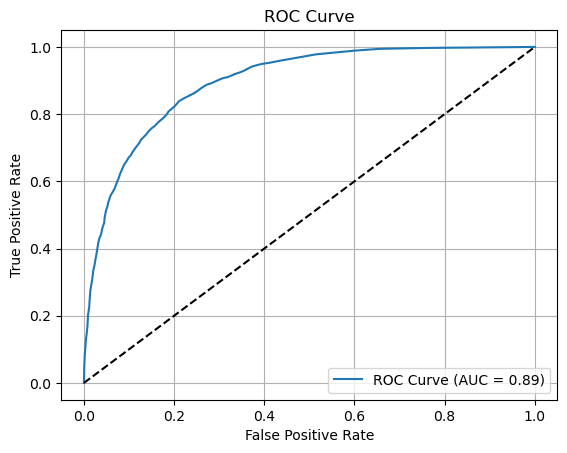

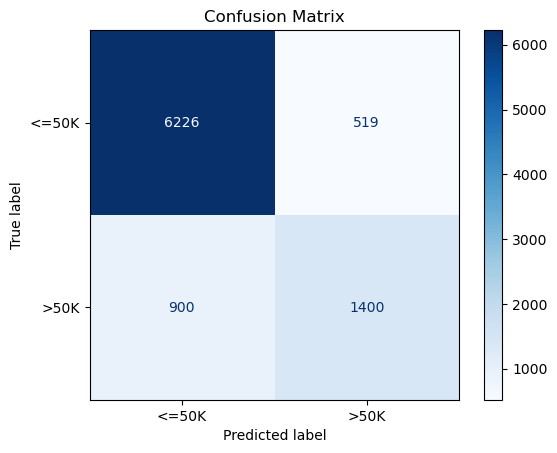

In [73]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_binary, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["<=50K", ">50K"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["<=50K", ">50K"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

##### Interpretation Confusion Matrix
- 6226: Correctly predicted people who earn <=50K.
- 1400: Correctly predicted people who earn >50K.
- 519: Incorrectly predicted >50K for people who actually earn <=50K.
- 900: Incorrectly predicted <=50K for people who actually earn >50K.

#### ROC Curve 
A ROC-AUC score of 0.895  indicatesthe model has high discriminative power in distinguishing between the two income classes (<=50k and >50k).


#### Class-Level Metrics:

(<=50K)
- Precision (0.87): When the model predicts <=50K, it's correct 87% of the time.

- Recall (0.92): Of all actual <=50K cases, 92% were correctly identified.

- F1-score (0.90): A balance of precision and recall — very strong performance.

(>50K)
- Precision (0.73): 73% of predicted >50K cases were actually >50K.

- Recall (0.61): The model only found 61% of actual >50K cases — many were missed.

- F1-score (0.66): Moderate; indicates this class is harder for the model to detect.

#### Overall Metrics:
- Accuracy (0.84): 84% of all predictions were correct.

- Macro Avg (0.80/0.77/0.78): Unweighted average across both classes — highlights imbalance.

- Weighted Avg (0.84/0.84/0.84): Adjusted for class size — skews toward <=50K, the dominant class.

#### Key Insight:
The model is adequate at predicting lower-income individuals, but  really struggles with identifying higher-income cases, likely due to:

Class imbalance (fewer >50K samples).


####  Model Hyper Tuning

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Identify column types
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# For numerical features: standardization 
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# For categorical features: one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

#  Define model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Combine preprocessing and modeling
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca',PCA(n_components=0.95)),  #  PCA
    ('classifier', RandomForestClassifier(random_state=42))
])
# Set hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
}

#  Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

#  Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score((y_test == ">50K").astype(int), y_proba))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      6745
        >50K       0.80      0.63      0.70      2300

    accuracy                           0.87      9045
   macro avg       0.84      0.79      0.81      9045
weighted avg       0.86      0.87      0.86      9045

ROC-AUC Score: 0.9196982950333579


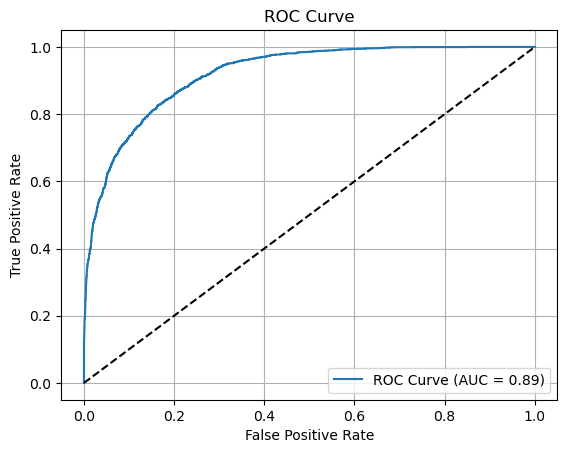

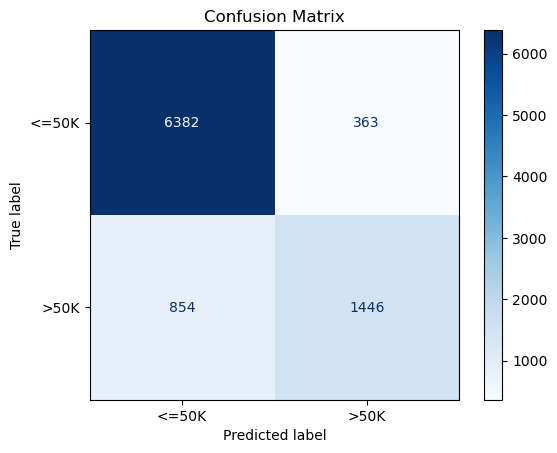

In [80]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_binary, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["<=50K", ">50K"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["<=50K", ">50K"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


### Class <=50K
- Precision: 0.88 – Of all predicted <=50K, 88% were correct.

- Recall: 0.95 – Caught 95% of actual <=50K cases — excellent.

- F1-Score: 0.91 – Strong balance between precision and recall.

### Class >50K
- Precision: 0.80 – Much improved from earlier scores.

- Recall: 0.63 – Still missing some high-income individuals, buta little better than before.

- F1-Score: 0.70 – Solid improvement; model is learning better class boundaries.

### Overall Metrics:
- Accuracy: 0.87 – 87% of predictions correct.

- Macro Avg F1: 0.81 – Balanced performance across both classes.

- Weighted Avg F1: 0.86 – Adjusted for support (class size).

### ROC-AUC Score: 0.92
This model can correctly rank a random >50K case above a <=50K case 92% of the time — a strong indicator of excellent discriminative power.

### Conclusion:
 The tuned model generalizes well and provides strong predictive accuracy and robustness, particularly given the income imbalance in the dataset.

- ## Saving The  Model

In [82]:
import joblib

# Save the entire pipeline
joblib.dump(best_model, 'income_classifier_pipeline.pkl')


['income_classifier_pipeline.pkl']

# Reccomendation
To build a more robust classification model for predicting whether a person earns above $50K annually, I recommend using a dataset with a more balanced distribution of income classes or applying techniques to mitigate class imbalance.

Despite hyperparameter tuning, the model struggled to accurately predict the minority class (>50K), likely due to the inherent class imbalance in the dataset. This imbalance can cause the model to become biased toward the majority class (<=50K), resulting in lower recall and F1-score for high-income predictions.

To improve performance, consider the following:

- Use a larger or more balanced dataset, or

- Apply techniques like SMOTE, class weighting, or stratified sampling to address imbalance.

# MODEL PRESENTATION

In [91]:
# LOADING OF THE MODEL
loaded_model=joblib.load('income_classifier_pipeline.pkl')

# INPUTS NEEDED TO TRIGGER MODEL 
sample = pd.DataFrame({
    "AGE": [45],
    "WORKCLASS": ["Private"],
    "EDUCATION": ["Masters"],
    "MARITAL-STATUS": ["Married-civ-spouse"],
    "OCCUPATION": ["Exec-managerial"],
    "RELATIONSHIP": ["Husband"],
    "RACE": ["White"],
    "SEX": ["Male"],
    "HOURS-PER-WEEK": [50],
    "NATIVE-COUNTRY":["United-States"],
    "FNLWGT": [77516],
    "CAPITAL-GAIN":[0],
    "CAPITAL-LOSS":[0],
    "EDUCATION-NUM":[13]
   
})

# PREDICTION OF THE FACTORS TO DETERMINE INCOME LEVEL.
prediction = loaded_model.predict(sample)
print("Predicted income:", prediction[0])


Predicted income: >50K
